## **Data collection**

In [1]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 35.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.

In [2]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1ce5fd88233834c00618506e820044c74612684452fa6dc6d366ee4e1e1ea48e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
pip install shap

###**Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
from numpy import linalg
import math
import cvxopt
import cvxopt.solvers
from cvxopt import matrix
from cvxopt import solvers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics as state
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from joblib import Parallel, delayed
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold

### **Importing Dataset**

In [5]:
data = pd.read_csv('/content/thyroid.csv')
data.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,Result
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


### **Exploratory Data Analysis**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

In [7]:
# shape of the dataset
data.shape

(3770, 30)

In [8]:
# size of the dataset
data.size

113100

In [9]:
# Viewing the dataset Columns
data.describe()

,Age,TSH,T3,T4,T4U,FTI,TBG
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,0.0
mean,51.724934,4.591025,1.603008,101.678462,0.892921,99.176844,NaN
std,20.097915,23.345886,1.097207,43.192637,0.354295,45.851205,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.250000,NaN
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000,NaN
75%,67.000000,2.475000,2.200000,123.000000,1.070000,121.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [10]:
# Checking for the data types
data.dtypes

,0
Age,int64
sex,object
thyroxine,object
queryonthyroxine,object
onantithyroidmedication,object
sick,object
pregnant,object
thyroidsurgery,object
I131treatment,object
queryhypothyroid,object


In [11]:
data.columns

Index(['Age', 'sex', 'thyroxine', 'queryonthyroxine',
       'onantithyroidmedication', 'sick', 'pregnant', 'thyroidsurgery',
       'I131treatment', 'queryhypothyroid', 'queryhyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSHmeasured', 'TSH',
       'T3measured', 'T3', 'TT4measured', 'T4', 'T4Umeasured', 'T4U',
       'FTImeasured', 'FTI', 'TBGmeasured', 'TBG', 'referral source',
       'Result'],
      dtype='object')

### **Feature Engineering**

In [12]:
data['Result'].unique()

array(['P', 'N'], dtype=object)

In [13]:
data['Result'].value_counts()

,count
Result,
P,3479
N,291


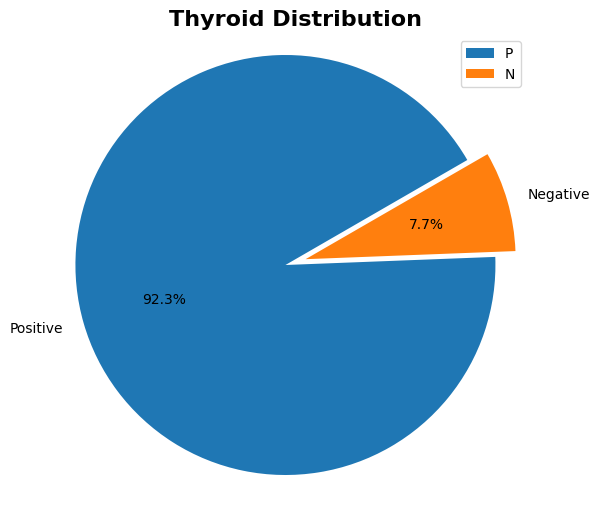

In [14]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Result'].value_counts()['P']
    negative_count = data['Result'].value_counts()['N']
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Result'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

In [15]:
# Create an empty list to store unique values
unique_values_list = []

# Iterate through each column in the dataset
for col in data.columns:
    # Get unique values for the current column
    unique_values = pd.unique(data[col])

    # Append the column name and its unique values to the list
    unique_values_list.append({'Column Name': col, 'Unique Values': unique_values})

# Create a DataFrame from the list of dictionaries
unique_values_df = pd.DataFrame(unique_values_list)

# Display the DataFrame
unique_values_df

,Column Name,Unique Values
0,Age,"[12, 20, 46, 70, 18, 59, 80, 66, 68, 84, 67, 7..."
1,sex,"[F, M, nan]"
2,thyroxine,"[f, t]"
3,queryonthyroxine,"[f, t]"
4,onantithyroidmedication,"[f, t]"
5,sick,"[f, t]"
6,pregnant,"[f, t]"
7,thyroidsurgery,"[f, t]"
8,I131treatment,"[f, t]"
9,queryhypothyroid,"[f, t]"


## **Data Preprocessing**

### **Check Missing Values**

In [16]:
data.isnull().sum()

,0
Age,0
sex,150
thyroxine,0
queryonthyroxine,0
onantithyroidmedication,0
sick,0
pregnant,0
thyroidsurgery,0
I131treatment,0
queryhypothyroid,0


In [17]:
# Let's drop some unnecessary columns
data=data.drop(['TSHmeasured','T3measured', 'TT4measured',  'T4Umeasured','FTImeasured','TBG','TBGmeasured'],axis=1)
#Dropping faulty data
data=data[data['Age']!=455]

In [18]:
data

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
0,12,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.00,0.0,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,0.0,109.0,0.91,120.0,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.00,0.0,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,30,F,f,f,f,f,f,f,f,f,...,t,f,f,0.00,0.0,0.0,0.00,0.0,other,P
3766,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,P
3767,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,P
3768,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,P


### **Imputation method for categorical columns**

In [19]:
most_frequent_sex = data['sex'].mode()[0]
data['sex'].fillna(most_frequent_sex, inplace=True)

<ipython-input-19-3990da54c4fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].fillna(most_frequent_sex, inplace=True)


In [20]:
data.isnull().sum()

,0
Age,0
sex,0
thyroxine,0
queryonthyroxine,0
onantithyroidmedication,0
sick,0
pregnant,0
thyroidsurgery,0
I131treatment,0
queryhypothyroid,0


### **Duplicates**

In [21]:
# dropping duplicates
data.duplicated().sum()

63

In [22]:
data = data.drop_duplicates()

In [23]:
data.duplicated().sum()

0

In [24]:
data.shape

(3706, 23)

### **Scaling (Normalization)**

In [25]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
columns=data.select_dtypes(include=['object']).columns
for i in columns:
  data[i]=lblEn.fit_transform(data[i])

In [26]:
data.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,1
1,20,1,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,0.00,0.0,4,1
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,0.0,109.0,0.91,120.0,4,1
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,0.00,0.0,4,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,3,1


In [27]:
data['Result'].value_counts()

,count
Result,
1,3415
0,291


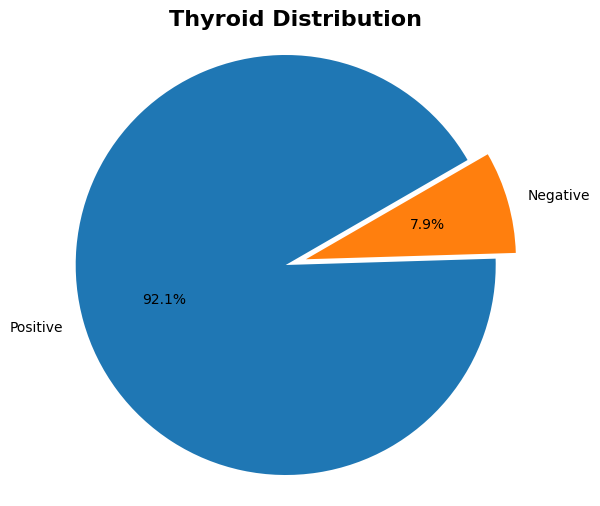

In [28]:
def balanced_plot(data):
    positive_count = data['Result'].value_counts()[1]
    negative_count = data['Result'].value_counts()[0]
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.show()

balanced_plot(data)

<Axes: xlabel='TSH', ylabel='FTI'>

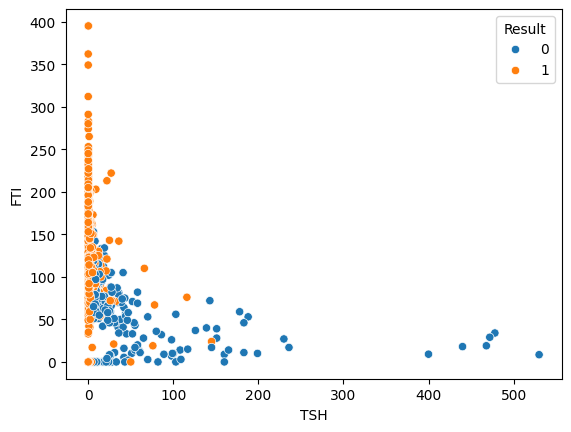

In [29]:
sns.scatterplot(x='TSH', y='FTI', hue='Result', data=data)

## **Split the dataset**

In [30]:
x=data.drop(['Result'],axis=1) #x contains all the features
y=data.Result   #y contains class label

In [31]:
x.shape

(3706, 22)

In [32]:
y.shape

(3706,)

In [33]:
y.value_counts()

,count
Result,
1,3415
0,291


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape

(2964, 22)

In [36]:
Y_train.shape

(2964,)

In [37]:
X_test.shape

(742, 22)

In [38]:
Y_test.shape

(742,)

In [39]:
X_train.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source
1294,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,1.6,94.0,0.93,101.0,3
511,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.61,1.6,116.0,0.91,127.0,4
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,3
2114,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2.70,1.5,103.0,0.95,109.0,4
2884,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.86,2.2,0.0,0.00,0.0,4


In [40]:
X_test[240:250]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source
1217,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0.0,230.0,1.06,217.0,4
2189,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,0.0,59.0,0.50,119.0,4
490,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00,0.0,86.0,1.04,83.0,4
1347,20,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.02,2.6,171.0,1.12,153.0,4
3584,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.25,2.0,77.0,0.75,103.0,4
51,64,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1.00,1.7,96.0,0.90,107.0,3
1096,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.01,3.4,133.0,0.84,159.0,4
3560,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.20,2.0,101.0,1.01,100.0,1
505,64,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.00,0.0,145.0,0.93,155.0,4
1144,34,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0.02,3.7,182.0,1.75,104.0,0


In [41]:
Y_test[50:60]

,Result
3107,1
1594,0
3124,1
447,1
999,1
2419,1
2976,1
2257,1
2438,1
740,1


## **FUZZY SVM**

In [42]:
class FuzzySVM:
    def __init__(self, C, kernel, gamma,probability=True):
        self.C = C
        self.kernel = kernel
        self.gamma = gamma
        self.probability=probability
        self.svm = SVC(C=self.C, kernel=self.kernel,gamma=self.gamma,probability=self.probability)

    def fit(self, X, y, fuzzy_membership):
        self.X = X
        self.y = y
        self.fuzzy_membership = fuzzy_membership
        # Weighted fitting
        sample_weights = self.C * self.fuzzy_membership
        self.svm.fit(self.X, self.y, sample_weight=sample_weights)

    def predict(self, X):
        return self.svm.predict(X)
    def predict_proba(self, X):
        # Ensure probability=True for predict_proba to be available
        if self.probability:
            return self.svm.predict_proba(X)
    def score(self, X, y):
        return self.svm.score(X, y)

# Define fuzzy membership function
def fuzzy_membershipL(X,y):
    f1='TSH'
    f2='FTI'
    T1= np.mean(X[f1])
    T2= np.mean(X[f2])
    delta=0.000001
    alpha=1
    beta=0.5
    f1_distance = np.zeros_like(y, dtype=float)
    f2_distance = np.zeros_like(y, dtype=float)
    for i in range(len(X)):
        # Calculate distance for each row
        f1_distance[i] = np.abs(T1 - X[f1].iloc[i])
        f2_distance[i] = np.abs(T2 - X[f2].iloc[i])

    # #Normalize distance
    f1_distances = f1_distance / (np.max(f1_distance)+delta)
    f2_distances = f2_distance / (np.max(f2_distance)+delta)

    # Using linear function
    f1_membership = (1-f1_distances)
    f2_membership = (1-f2_distances)

    # Assign membership
    membership = (alpha*f1_membership) + (beta*f2_membership)

    # Calculate class ratios
    class_0 = np.sum(y == 0)
    class_1 = np.sum(y == 1)

    # Adjust for class imbalance
    class_0_ratio = 1
    class_1_ratio = class_0/class_1
    membership[y == 0] *= class_0_ratio
    membership[y == 1] *= class_1_ratio
    return membership

def fuzzy_membershipE(X,y):
    f1='TSH'
    f2='FTI'
    T1= np.mean(X[f1])
    T2= np.mean(X[f2])
    delta=0.000001
    alpha=1
    beta=0.5
    gamma=1
    f1_distance = np.zeros_like(y, dtype=float)
    f2_distance = np.zeros_like(y, dtype=float)
    for i in range(len(X)):
        # Calculate distance for each row
        f1_distance[i] = np.abs(T1 - X[f1].iloc[i])
        f2_distance[i] = np.abs(T2 - X[f2].iloc[i])

    # Using exponential decay
    f1_membership = 2/(1+np.exp(gamma*f1_distance))
    f2_membership = 2/(1+np.exp(gamma*f2_distance))

    # Assign membership
    membership = (alpha*f1_membership) + (beta*f2_membership)

    # Calculate class ratios
    class_0 = np.sum(y == 0)
    class_1 = np.sum(y == 1)

    # Adjust for class imbalance
    class_0_ratio = 1
    class_1_ratio = class_0/class_1
    membership[y == 0] *= class_0_ratio
    membership[y == 1] *= class_1_ratio
    return membership

In [78]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='rbf', C=100,gamma='scale')
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if(i==2):
      break

In [44]:
fuzzy_svmL = FuzzySVM(C=100, kernel='rbf', gamma='scale',probability=True)
fuzzy_svmL.fit(x_train, y_train, fuzzy_membershipL(x_train,y_train))

fuzzy_svmE = FuzzySVM(C=100, kernel='rbf', gamma='scale',probability=True)
fuzzy_svmE.fit(x_train, y_train, fuzzy_membershipE(x_train,y_train))

In [80]:
x_test[60:100]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source
354,61,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.400,0.0,113.0,1.06,106.0,4
356,83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.900,1.4,95.0,0.81,118.0,3
375,18,1,1,0,0,0,0,0,1,1,...,0,0,0,0,25.000,1.1,136.0,0.96,143.0,4
376,34,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0.400,0.0,109.0,0.91,120.0,4
377,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.100,1.3,108.0,0.83,130.0,3
380,56,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.200,1.4,71.0,0.72,99.0,4
388,32,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0.150,2.9,132.0,1.14,116.0,1
395,54,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.010,3.6,142.0,1.23,115.0,4
406,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,9.700,0.5,37.0,0.72,51.0,3
407,34,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0.830,2.4,114.0,1.02,112.0,1


In [46]:
y_test[10:60]

,Result
57,0
59,0
62,1
66,1
67,1
68,1
70,1
72,1
74,1
88,0


## **Explainable AI**

### **LIME**

In [97]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Negative','Positive']

# Get the feature names
feature_names = list(x_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(x_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')
top_features=['TSH','goitre','FTI','pregnant','T4','sex']
#Get prediction for a specific instance
value = explainer.explain_instance(x_test.values[95], fuzzy_svmL.predict_proba, num_features=6)
#Plot prediction
value.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [52]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Negative','Positive']

# Get the feature names
feature_names = list(x_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(x_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')
#Get prediction for a specific instance
value = explainer.explain_instance(x_test.values[11], fuzzy_svmL.predict_proba, num_features=6)
plt.rcParams.update({'font.size': 20})
#Plot prediction
value.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer
from interpret.blackbox import LimeTabular
from interpret import show
# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabular(fuzzy_svm.predict_proba, data=X_train, random_state=1)
#Get prediction for a specific instance
value = explainer.explain_local(X_test[:20], Y_test[:20], num_features=len(X_train.columns))

#Plot prediction
show(value)


### **SHAP**

In [ ]:
import shap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# load JS visualization code to notebook
shap.initjs()
x_train_sample=shap.sample(x_train,500)
x_test_sample=shap.sample(x_test,100)

# Create the explainer
explainerL = shap.KernelExplainer(fuzzy_svmL.predict, x_train_sample)

shap_valuesL = explainerL.shap_values(x_test_sample)

# #Plot visualization
# plt.figure()
# shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

# Create the explainer
explainerE = shap.KernelExplainer(fuzzy_svmE.predict, x_train_sample)

shap_valuesE = explainerE.shap_values(x_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
x_test_sample[100:120]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source


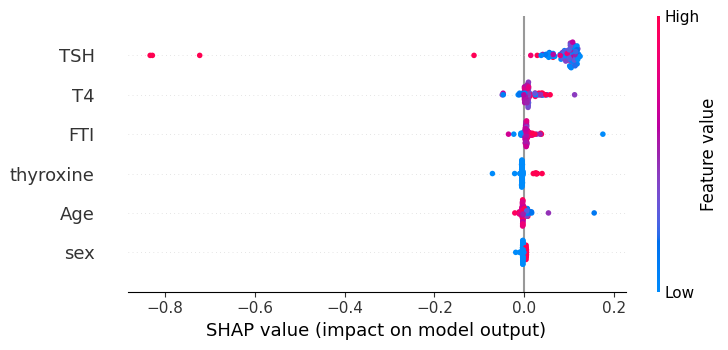

In [ ]:
shap.summary_plot(shap_valuesL, x_test_sample,max_display=6)

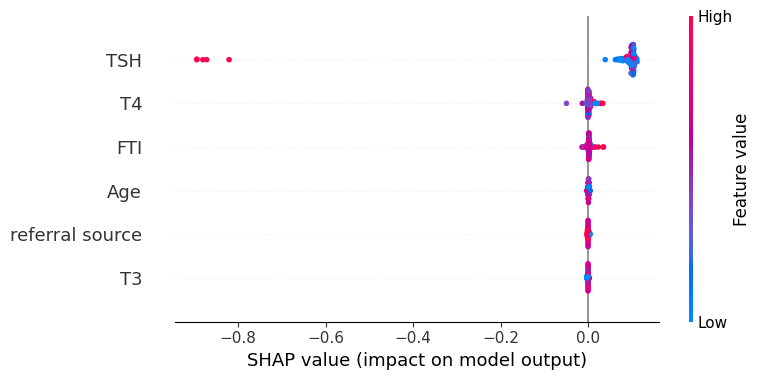

In [ ]:
#Plot visualization
plt.figure()
shap.summary_plot(shap_valuesE, x_test_sample,max_display=6)

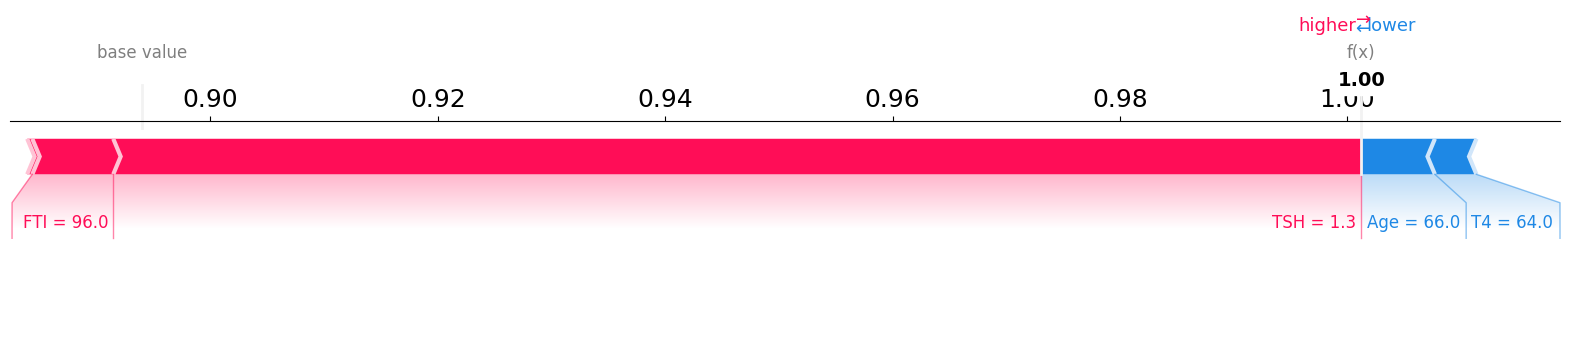

In [ ]:
# Set global font size for the force plot
plt.rcParams.update({'font.size': 18})
# Get the absolute SHAP values to sort by importance
instance_index = 11

# Get the SHAP values for the specific instance
shap_values_instance = shap_valuesE[instance_index]

# Get the indices of the top 5 features with the highest absolute SHAP values
top_features_indices = np.argsort(abs_shap_values)[-5:]  # Change the number to limit feature count

# Sort the features and SHAP values to display in the correct order
top_features_indices = top_features_indices[::-1]  # Reverse the order to show the most important feature first
top_shap_values = shap_valuesL[instance_index][top_features_indices]
top_feature_names = x_test_sample.columns[top_features_indices]

# Get the actual feature values for the top 5 features
top_feature_values = x_test_sample.iloc[instance_index, top_features_indices]
# Plot the force plot with the top 5 features
shap.force_plot(explainerE.expected_value,top_shap_values, top_feature_values,feature_names=top_feature_names, matplotlib=True)

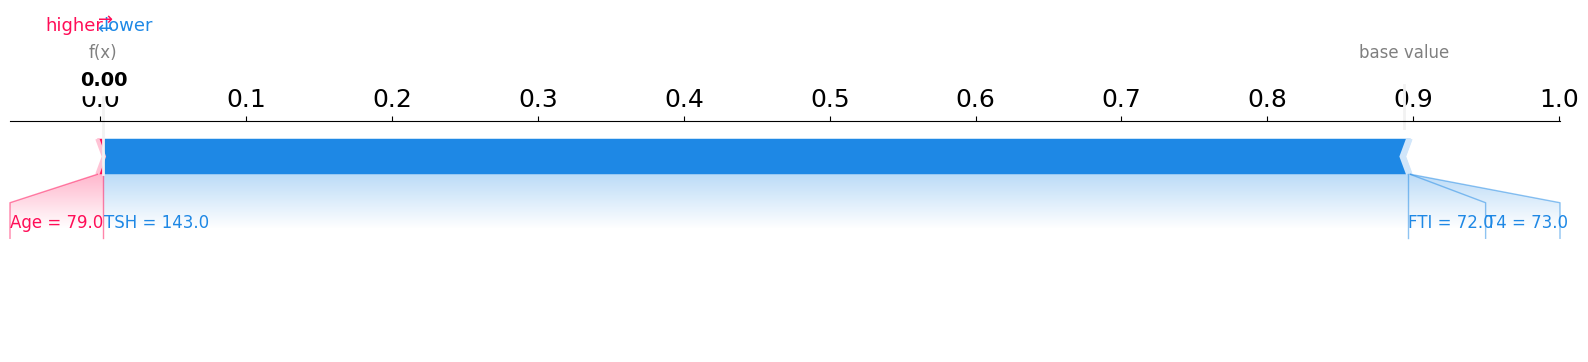

In [ ]:
# Set global font size for the force plot
plt.rcParams.update({'font.size': 18})
# Get the absolute SHAP values to sort by importance
instance_index = 12

# Get the SHAP values for the specific instance
shap_values_instance = shap_valuesE[instance_index]

# Get the indices of the top 5 features with the highest absolute SHAP values
top_features_indices = np.argsort(abs_shap_values)[-4:]  # Change the number to limit feature count

# Sort the features and SHAP values to display in the correct order
top_features_indices = top_features_indices[::-1]  # Reverse the order to show the most important feature first
top_shap_values = shap_valuesE[instance_index][top_features_indices]
top_feature_names = x_test_sample.columns[top_features_indices]

# Get the actual feature values for the top 5 features
top_feature_values = x_test_sample.iloc[instance_index, top_features_indices]
# Plot the force plot with the top 5 features
shap.force_plot(explainerE.expected_value,top_shap_values, top_feature_values,feature_names=top_feature_names, matplotlib=True)

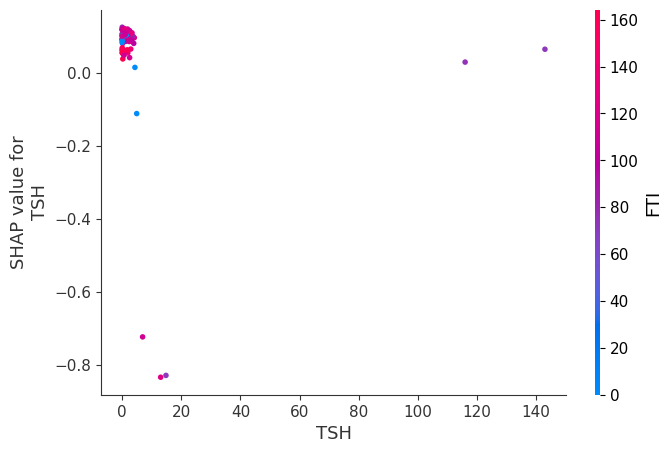

In [ ]:
shap.dependence_plot('TSH' ,shap_valuesL, x_test_sample, interaction_index='FTI')

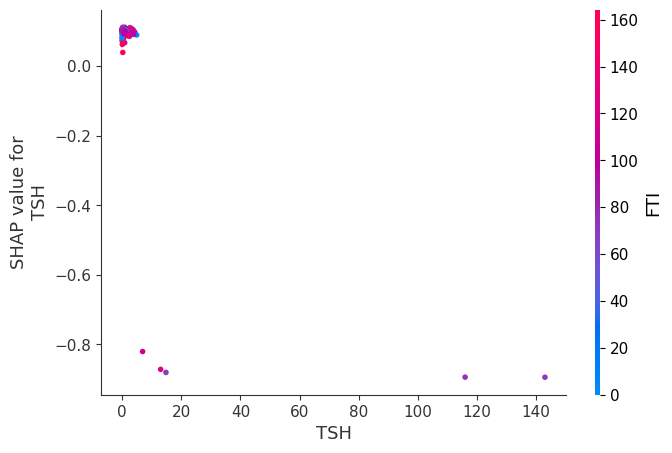

In [ ]:
shap.dependence_plot('TSH' ,shap_valuesE, x_test_sample, interaction_index='FTI')